# **Comparativa Resultados**

**Comparativa de resultados**


Mejor modelo según AUC-ROC:
Modelo         XGBoost classifier
Accuracy                   0.9167
Precision                     1.0
Recall                   0.705882
F1 Score                 0.827586
AUC-ROC                  0.963064
Log-Loss                 0.292356
MCC                      0.795206
Specificity                   1.0
Name: 0, dtype: object


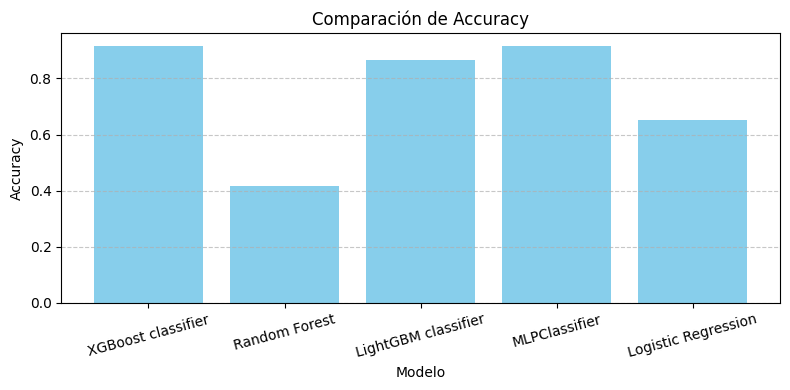

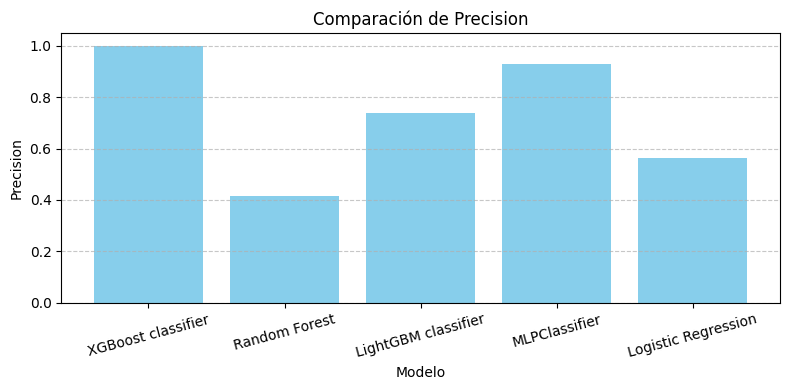

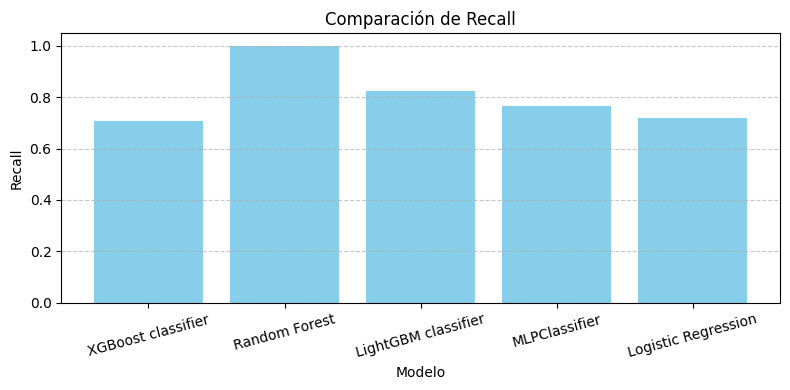

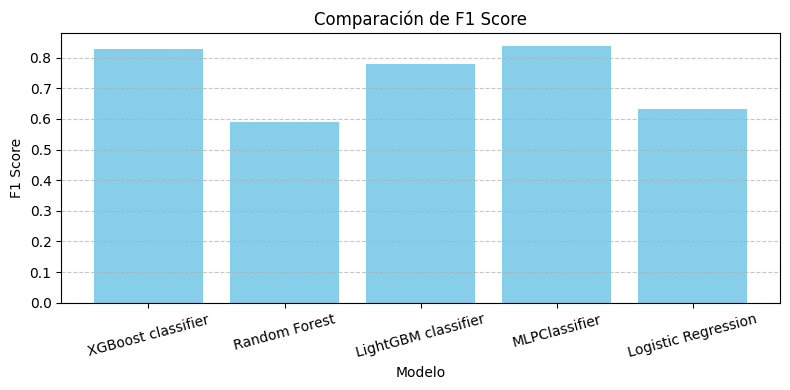

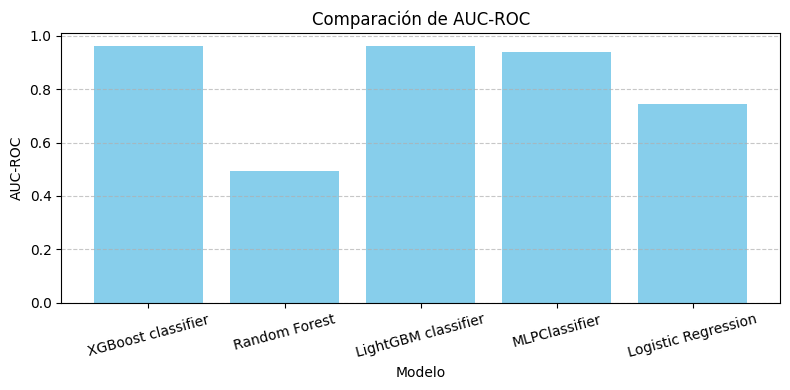

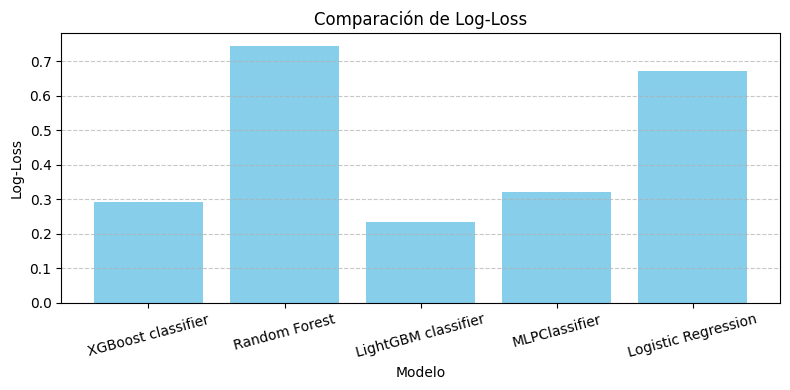

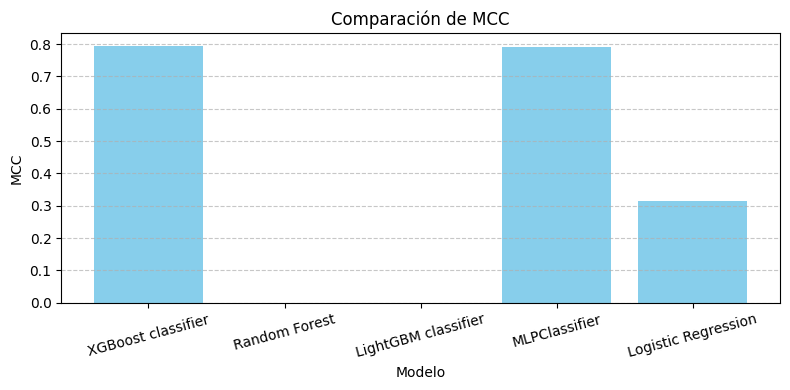

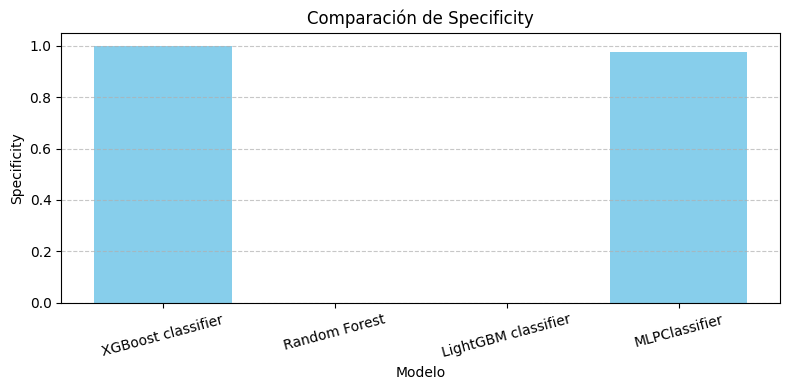

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL raw del archivo metrics.csv
url = "https://raw.githubusercontent.com/ricartorres/Insuficiencia-Cardiaca/master/scripts/training/metrics.csv"

# Leer el archivo CSV desde GitHub
df = pd.read_csv(url, delimiter=",")

df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float) / 100  # Convertir porcentaje a flotante
numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Log-Loss', 'MCC', 'Specificity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')  # Asegurar numéricos
# Evaluar el mejor modelo según AUC-ROC
best_model = df.loc[df['AUC-ROC'].idxmax()]
print("\nMejor modelo según AUC-ROC:")
print(best_model)

# Crear gráficos individuales para cada métrica
for metric in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.bar(df['Modelo'], df[metric], color='skyblue')
    plt.title(f'Comparación de {metric}')
    plt.xlabel('Modelo')
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



In [2]:
# Crear una gráfica general que compare todas las métricas
metrics_data = df[numeric_columns].T  # Transponer para facilitar la comparación
metrics_data.columns = df['Modelo']



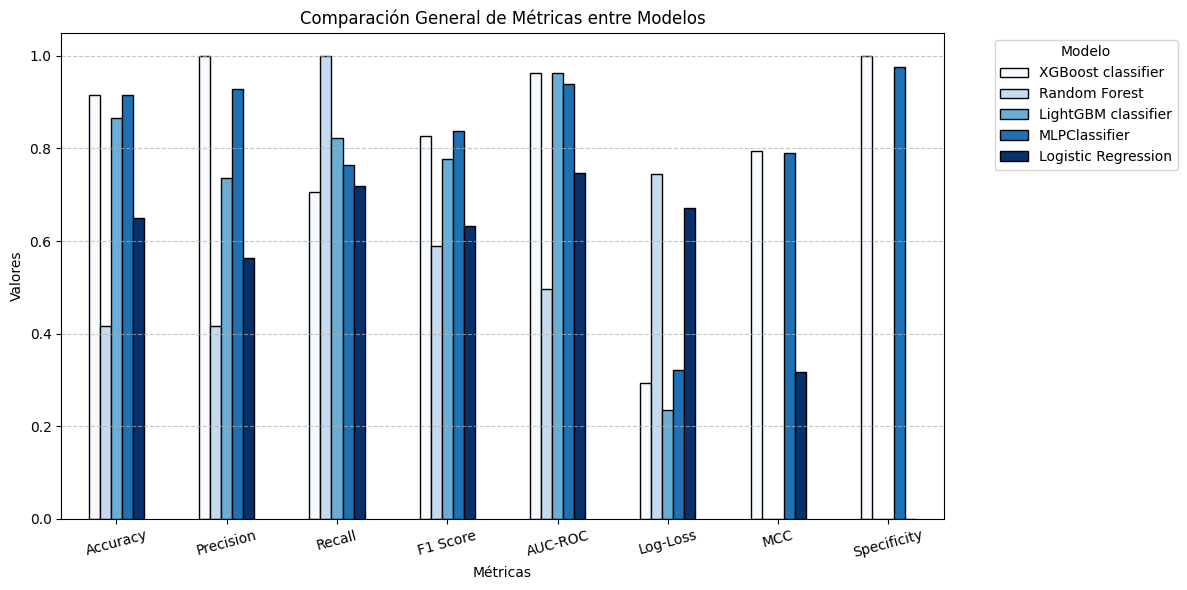

In [3]:
# Gráfica general con paleta azul salud
ax = metrics_data.plot(
    kind='bar',
    figsize=(12, 6),
    colormap='Blues',  # Paleta de colores basada en tonos azules
    edgecolor='black'
)
ax.set_title('Comparación General de Métricas entre Modelos')
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_xticks(range(len(metrics_data.index)))
ax.set_xticklabels(metrics_data.index, rotation=15)
ax.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar la estética
plt.tight_layout()
plt.show()

In [4]:
# Mostrar el mejor modelo por código
print(f"El mejor modelo es '{best_model['Modelo']}' con AUC-ROC de {best_model['AUC-ROC']:.4f}")


El mejor modelo es 'XGBoost classifier' con AUC-ROC de 0.9631
